In [4]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#set working directory
os.chdir(os.getcwd()+'/Data')

### Data Prep for Interactive Graphic

In [9]:
#import mobility data and shapefiles

#import census tract file
shapes = gpd.read_file('all_cts.shp')

#import trip files
nyc = pd.read_csv('nyc_clean.csv')
chic = pd.read_csv('chic_clean.csv')
sf = pd.read_csv('sf_clean.csv')
la = pd.read_csv('la_clean.csv')

In [30]:
#change data type for joining to clean data
shapes['GEOID'] = shapes['GEOID'].astype(int)

In [31]:
#define cleaning function
def clean_data(df1,df2):
    '''function to restructure data'''
    df_grouped = pd.DataFrame(df1.groupby(['origin_ct','dest_ct'])['od_counts'].sum())
    df_grouped.reset_index(inplace=True)
    df_grouped = pd.merge(left=df_grouped,right=df2,how='left',left_on='dest_ct',right_on='GEOID')
    df_clean = df_grouped[['origin_ct','dest_ct','od_counts','geometry']]
    return df_clean

In [32]:
#create cleaned data frames
nyc_grouped = clean_data(nyc,shapes)
chic_grouped = clean_data(chic,shapes)
sf_grouped = clean_data(sf,shapes)
la_grouped = clean_data(la,shapes)

In [38]:
#export data to csv
nyc_grouped.to_csv('nyc_vis.csv')
chic_grouped.to_csv('chic_vis.csv')
sf_grouped.to_csv('sf_vis.csv')
la_grouped.to_csv('la_vis.csv')

In [40]:
nyc_grouped.head()

,origin_ct,dest_ct,od_counts,geometry
0,9001010101,9001035300,6,"POLYGON ((-73.53413399999999 41.15024, -73.532..."
1,9001010101,9001050600,1,"POLYGON ((-73.34748499999999 41.108252, -73.34..."
2,9001010101,9001100200,14,"POLYGON ((-73.24877599999999 41.334036, -73.24..."
3,9001010101,9001110302,12,"POLYGON ((-73.163511 41.270637, -73.162408 41...."
4,9001010101,9001110500,4,"POLYGON ((-73.20480000000001 41.29936, -73.189..."


### Aggregated CT files by time and Volume for Data Vis

In [42]:
nyc_time = pd.DataFrame(nyc.groupby(['dest_ct','time_period'])['od_counts'].sum())
chic_time = pd.DataFrame(chic.groupby(['dest_ct','time_period'])['od_counts'].sum())
la_time = pd.DataFrame(la.groupby(['dest_ct','time_period'])['od_counts'].sum())
sf_time = pd.DataFrame(sf.groupby(['dest_ct','time_period'])['od_counts'].sum())

In [43]:
nyc_time.to_csv('nyc_time_vis.csv')
chic_time.to_csv('chic_time_vis.csv')
sf_time.to_csv('sf_time_vis.csv')
la_time.to_csv('la_time_vis.csv')

In [44]:
nyc_time.head()

od_counts
dest_ct    time_period             
9001010101 10:00 - 10:30        129
           6:00 - 6:30          114
           6:30 - 7:00          134
           7:00 - 7:30          142
           7:30 - 8:00          247

### Cluster Visualization

In [76]:
#read in cluster data sets
chicago_cluster = pd.read_csv('chic_clusters.csv')
nyc_cluster = pd.read_csv('nyc_clusters.csv')
la_cluster = pd.read_csv('la_clusters.csv')
sf_cluster = pd.read_csv('sf_clusters.csv')

In [77]:
chicago_cluster = pd.merge(left=chicago_cluster,right=shapes,how='left',left_on='origin_ct',right_on='GEOID')
nyc_cluster = pd.merge(left=nyc_cluster,right=shapes,how='left',left_on='origin_ct',right_on='GEOID')
la_cluster = pd.merge(left=la_cluster,right=shapes,how='left',left_on='origin_ct',right_on='GEOID')
sf_cluster = pd.merge(left=sf_cluster,right=shapes,how='left',left_on='origin_ct',right_on='GEOID')

In [78]:
chicago_cluster = chicago_cluster[['origin_ct','0','geometry']]
nyc_cluster = nyc_cluster[['origin_ct','0','geometry']]
la_cluster = la_cluster[['origin_ct','0','geometry']]
sf_cluster = sf_cluster[['origin_ct','0','geometry']]

In [79]:
chicago_cluster_gpd = gpd.GeoDataFrame(chicago_cluster,geometry=chicago_cluster['geometry'])
nyc_cluster_gpd = gpd.GeoDataFrame(nyc_cluster,geometry=nyc_cluster['geometry'])

la_cluster_gpd = gpd.GeoDataFrame(la_cluster,geometry=la_cluster['geometry'])
sf_cluster_gpd = gpd.GeoDataFrame(sf_cluster,geometry=sf_cluster['geometry'])

(-122.5, -122.3, 37.7, 37.9)

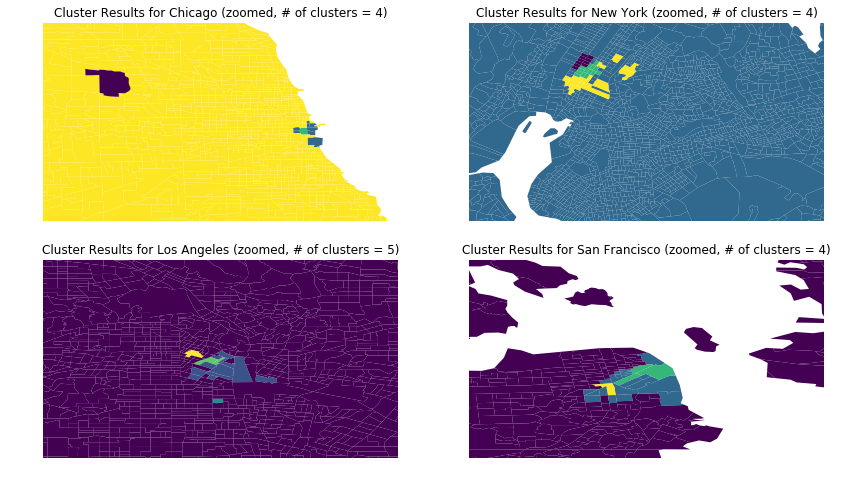

In [89]:
fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(221)
chicago_cluster_gpd.plot(column='0', cmap='viridis',ax=ax1)
ax1.set_xlim((-88,-87.5))
ax1.set_ylim((41.7,42.1))
ax1.set_title("Cluster Results for Chicago (zoomed, # of clusters = 4)")
ax1.axis("off")

ax2 = fig.add_subplot(222)
nyc_cluster_gpd.plot(column='0', cmap='viridis',ax=ax2)
ax2.set_xlim((-74.1,-73.75))
ax2.set_ylim((40.6,40.8))
ax2.set_title("Cluster Results for New York (zoomed, # of clusters = 4)")
ax2.axis("off")

ax3 = fig.add_subplot(223)
la_cluster_gpd.plot(column='0', cmap='viridis',ax=ax3)
ax3.set_xlim((-118.4,-118.1))
ax3.set_ylim((33.9,34.2))
ax3.set_title("Cluster Results for Los Angeles (zoomed, # of clusters = 5)")
ax3.axis("off")

ax4 = fig.add_subplot(224)
sf_cluster_gpd.plot(column='0', cmap='viridis',ax=ax4)
ax4.set_xlim((-122.5,-122.3))
ax4.set_ylim((37.7,37.9))
ax4.set_title("Cluster Results for San Francisco (zoomed, # of clusters = 4)")
ax4.axis("off")